Summary Statistics (Gas)
Mean: 3073.2629861821997
Standard Deviation: 635.7237546860034
Correlation: -0.6997826899646014


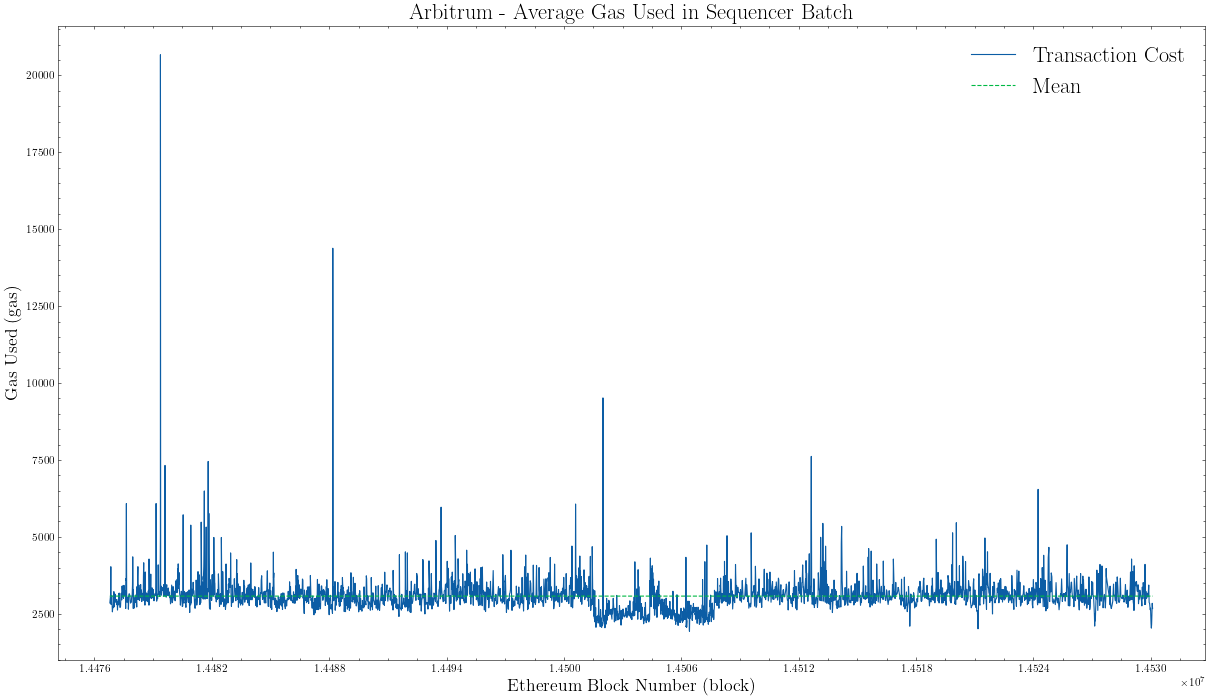

In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib
from matplotlib.pyplot import figure
matplotlib.rcParams['text.usetex'] = True
plt.style.use('science')

with open("../data/arbitrum3000.json", "r") as f:
    data = json.load(f)

#timestamp -> blockNo, tx's, average tx per gas for data avilability
x_ts = []
y_txs = []
y_gas = []

for ts in data:
    x_ts.append(data[ts][0])
    y_txs.append(data[ts][1])
    y_gas.append(data[ts][2])
     

y_gas_mean = [np.mean(y_gas)] * len(y_gas)


print("Summary Statistics (Gas)")
print("Mean:", np.mean(y_gas))
print("Standard Deviation:", np.std(y_gas))
print("Correlation:", np.corrcoef(y_txs, y_gas)[0][1]) #even with fluctuating ETH price, high correlation

fig,ax = plt.subplots(figsize=(18.5, 10.5), dpi=80)


# Plot the data
data_line = ax.plot(x_ts , y_gas, label='Transaction Cost')

# Plot the average line
mean_line = ax.plot(x_ts,y_gas_mean, label='Mean', linestyle='--')

# Make a legend
legend = ax.legend(loc='upper right', fontsize=20)

plt.title("Arbitrum - Average Gas Used in Sequencer Batch", fontsize = 20)
plt.xlabel("Ethereum Block Number (block)", fontsize=16)
plt.ylabel("Gas Used (gas)", fontsize=16)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.show()
